In [275]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline


In [276]:
# ---------------------------------------------------------------------------
# -----------------------------------SETTINGS--------------------------------
# ---------------------------------------------------------------------------
# Change the path_no, speed_no and angle to select which set of data you want to visualise.
# To switch between 1 charging station and 2 charging stations, switch between /New_1Intermediate and /New_2Intermediate
# When visualising tests where there was NO wind, set the speed_no to 0, and angle to None, otherwise the code will throw an error. 

path_no = 2
speed_no = 2
angle = 90

# Change according to your directory path:
parent_folder = "/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/flying"

dataE3 = pd.read_csv(f"{parent_folder}/New_2Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E3.csv")
dataE5 = pd.read_csv(f"{parent_folder}/New_2Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E5.csv")
dataE7 = pd.read_csv(f"{parent_folder}/New_2Intermediate/path_{path_no}/wind_speed_{speed_no}/wind_direction_{angle}/drone_E7.csv")

# Changing milliseconds to seconds.
dataE3["time.ms"] = dataE3["time.ms"].map(lambda x : x/1000)
dataE5["time.ms"] = dataE5["time.ms"].map(lambda x : x/1000)
dataE7["time.ms"] = dataE7["time.ms"].map(lambda x : x/1000)

# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# No-wind variants used for comparison later:
dataE3_no_wind = pd.read_csv(f"{parent_folder}/New_2Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E3.csv")
dataE3_no_wind["time.ms"] = dataE3_no_wind["time.ms"].map(lambda x : x/1000)

dataE5_no_wind = pd.read_csv(f"{parent_folder}/New_2Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E5.csv")
dataE5_no_wind["time.ms"] = dataE5_no_wind["time.ms"].map(lambda x : x/1000)

dataE7_no_wind = pd.read_csv(f"{parent_folder}/New_2Intermediate/path_{path_no}/wind_speed_0/wind_direction_None/drone_E7.csv")
dataE7_no_wind["time.ms"] = dataE7_no_wind["time.ms"].map(lambda x : x/1000)



Text(0, 0.5, 'Voltage')

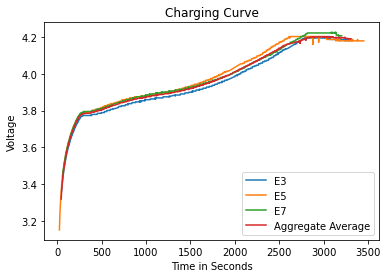

In [277]:
# ---------------------------------------------------------------------------
# ------------------------------CHARGING OVER TIME---------------------------
# ---------------------------------------------------------------------------


chargingE7 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/batteryE7.csv")
chargingE5 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/battery1.csv")
chargingE3 = pd.read_csv(f"/Users/sarahbradley/Documents/SCSLab/crazyflie-lib-python/OurCodes/testing/batteryE3.csv")

# Convert milliseconds to seconds:
chargingE3["time.ms"] = chargingE3["time.ms"].map(lambda x : x/1000)
chargingE5["time.ms"] = chargingE5["time.ms"].map(lambda x : x/1000)
chargingE7["time.ms"] = chargingE7["time.ms"].map(lambda x : x/1000)

# Plot three drone charging curves:
charginggraph = chargingE3.plot(x="time.ms", y="pm.vbat")
chargingE5.plot(x="time.ms", y="pm.vbat", ax = charginggraph)
chargingE7.plot(x="time.ms", y ="pm.vbat", ax= charginggraph)

# Line of best fit from three charging curves:
aggregate_avg = {"pm.vbat": (chargingE3["pm.vbat"] + chargingE5["pm.vbat"] + chargingE7["pm.vbat"]).map(lambda x : x/3), 
            "time.ms": (chargingE7["time.ms"]+chargingE3["time.ms"]+chargingE5["time.ms"]).map(lambda x : x/3)} 
avg_charge_df = pd.DataFrame(aggregate_avg)
avg_charge_df.plot(x="time.ms", y="pm.vbat", ax = charginggraph)
# batterygraph.set_xlim(0, None)

# Formatting:
charginggraph.legend(["E3","E5","E7","Aggregate Average"])
charginggraph.set_title("Charging Curve")
charginggraph.set_xlabel("Time in Seconds")
charginggraph.set_ylabel("Voltage")

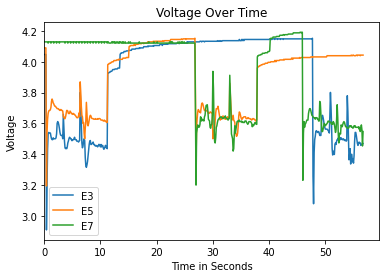

In [278]:
# ---------------------------------------------------------------------------
# ------------------------------BATTERY MAPPING------------------------------
# ---------------------------------------------------------------------------


# Graphing voltage over time.
batterygraph = dataE3.plot(x="time.ms", y="pm.vbat")
dataE5.plot(x="time.ms", y="pm.vbat", ax = batterygraph)
dataE7.plot(x="time.ms", y ="pm.vbat", ax= batterygraph)
batterygraph.set_xlim(0, None)
batterygraph.legend(["E3","E5","E7"])
batterygraph.set_title("Voltage Over Time")
batterygraph.set_xlabel("Time in Seconds")
batterygraph.set_ylabel("Voltage")

# Other syntax for plotting multiple graphs in one axes:
# fig = plt.figure()
# for frame in [dataE3, dataE5, dataE7]:
#     plt.plot(frame['time.ms'], frame['pm.vbat'])


plt.show()

With Wind Line of Best Fit:
0.0024870142413052484
NO Wind Line Of Best Fit:
-0.00377820063893255


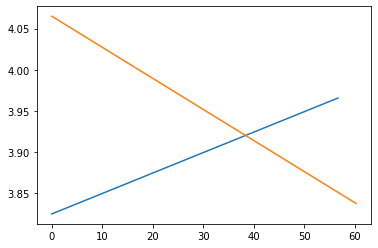

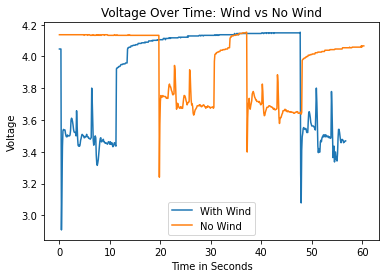

In [287]:
# ---------------------------------------------------------------------------
# -----------------------COMPARING GRADIENTS OF VOLTAGE----------------------
# ---------------------------------------------------------------------------

# Line of best fit: Wind vs No Wind

# Line of best with WITH wind.
m, b = np.polyfit(dataE3["time.ms"], dataE3["pm.vbat"], 1)
plt.plot(dataE3["time.ms"], m*dataE3["time.ms"]+b, label = "Wind")
print("With Wind Line of Best Fit:")
print(m)

# Line of best fit with NO Wind
m1, b1 = np.polyfit(dataE3_no_wind["time.ms"], dataE3_no_wind["pm.vbat"], 1)
plt.plot(dataE3_no_wind["time.ms"], m1*dataE3_no_wind["time.ms"]+b1)
print("NO Wind Line Of Best Fit:")
print(m1)


# gradient_plot.legend(["With Wind","No Wind"])
# gradient_plot.set_title("Voltage Over Time: Gradient of Wind vs No Wind")
# gradient_plot.set_xlabel("Time in Seconds")
# gradient_plot.set_ylabel("Voltage")

# Voltage graphs:
batterygraph = dataE3.plot(x="time.ms", y="pm.vbat")
dataE3_no_wind.plot(x="time.ms", y="pm.vbat", ax = batterygraph)



batterygraph.legend(["With Wind","No Wind", "Wind Gradient Best Fit", "NO Wind Best Fit"])
batterygraph.set_title("Voltage Over Time: Wind vs No Wind")
batterygraph.set_xlabel("Time in Seconds")
batterygraph.set_ylabel("Voltage")

plt.show()


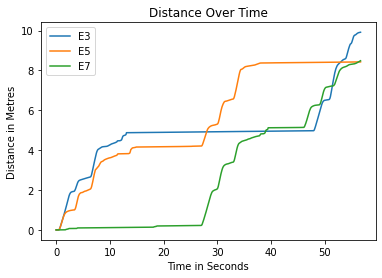

In [280]:
# ---------------------------------------------------------------------------
# -------------------------------DISTANCE MAPPING----------------------------
# ---------------------------------------------------------------------------

distancegraph = dataE3.plot(x="time.ms", y="travel_dist")
dataE5.plot(x="time.ms", y="travel_dist", ax = distancegraph)
dataE7.plot(x="time.ms", y="travel_dist", ax = distancegraph)
distancegraph.legend(["E3","E5","E7"])
distancegraph.set_title("Distance Over Time")
distancegraph.set_xlabel("Time in Seconds")
distancegraph.set_ylabel("Distance in Metres")
plt.show()

# How many seconds would it take to fully charge:
# First find the number of seconds:
# np.interp(3.7, time_data, volt_data)

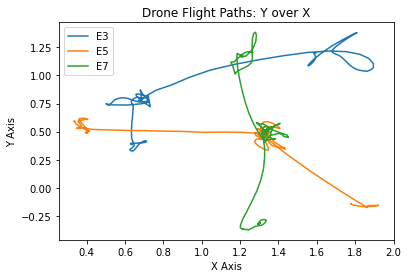

In [281]:
# ---------------------------------------------------------------------------
# ---------------------------X, Y COORDINATES MAPPING------------------------
# ---------------------------------------------------------------------------

x_ycoord = dataE3.plot(x="stateEstimate.x", y="stateEstimate.y")
dataE5.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord)
dataE7.plot(x="stateEstimate.x", y="stateEstimate.y", ax = x_ycoord)
x_ycoord.legend(["E3","E5","E7"])
x_ycoord.set_title("Drone Flight Paths: Y over X")
x_ycoord.set_xlabel("X Axis")
x_ycoord.set_ylabel("Y Axis")
plt.show()


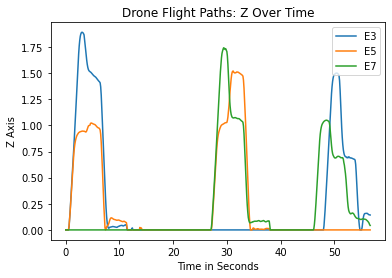

In [282]:
# ---------------------------------------------------------------------------
# ----------------------------Z COORDINATES MAPPING--------------------------
# ---------------------------------------------------------------------------

z_coord = dataE3.plot(x="time.ms", y="stateEstimate.z")
dataE5.plot(x="time.ms", y="stateEstimate.z", ax = z_coord)
dataE7.plot(x="time.ms", y="stateEstimate.z", ax = z_coord)
z_coord.legend(["E3","E5","E7"])
z_coord.set_title("Drone Flight Paths: Z Over Time")
z_coord.set_xlabel("Time in Seconds")
z_coord.set_ylabel("Z Axis")
plt.show()





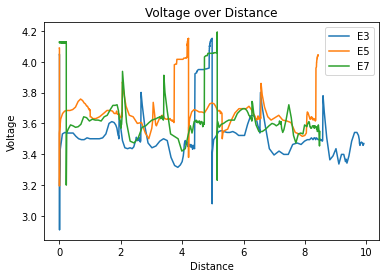

In [283]:
# ---------------------------------------------------------------------------
# ------------------------Voltage Change Over Distance-----------------------
# ---------------------------------------------------------------------------

distance_voltage = dataE3.plot(x="travel_dist", y="pm.vbat")
dataE5.plot(x="travel_dist", y="pm.vbat", ax = distance_voltage)
dataE7.plot(x="travel_dist", y="pm.vbat", ax = distance_voltage)
distance_voltage.legend(["E3","E5","E7"])
distance_voltage.set_title("Voltage over Distance")
distance_voltage.set_xlabel("Distance")
distance_voltage.set_ylabel("Voltage")

# Line of Best Fit:

# m2, b2 = np.polyfit(dataE3["travel_dist"], dataE3["pm.vbat"], 1)
# plt.plot(dataE3["travel_dist"], m2*dataE3["travel_dist"]+b2)
# print("Gradient E3:")
# print(m2)

# m3, b3 = np.polyfit(dataE5["travel_dist"], dataE5["pm.vbat"], 1)
# plt.plot(dataE5["travel_dist"], m3*dataE5["travel_dist"]+b3)
# print("Gradient E5:")
# print(m3)

plt.show()



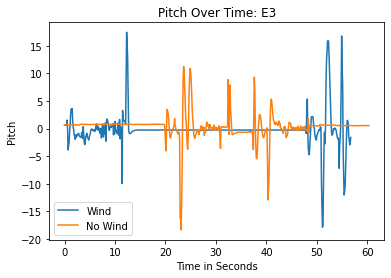

Standard Deviation of Drone E3 with Wind
2.9758659941949106
Standard Deviation of Drone E3 with NO Wind
2.3378388069421643


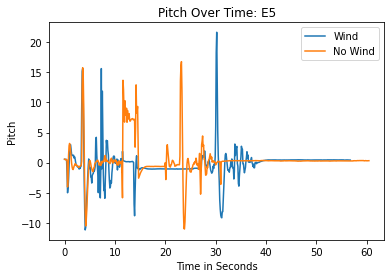

Standard Deviation of Drone E5 with Wind
2.6801193828590026
Standard Deviation of Drone E5 with NO Wind
2.829391581804704


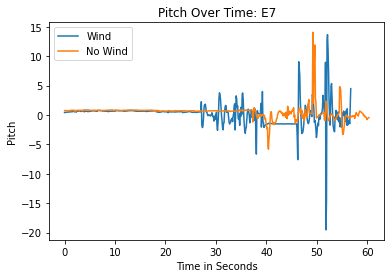

Standard Deviation of Drone E7 with Wind
2.027396262366689
Standard Deviation of Drone E7 with NO Wind
1.2009135304651017


In [284]:
# ---------------------------------------------------------------------------
# --------------------------PITCH FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------


# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------


pitch_timeE3 = dataE3.plot(x="time.ms", y ="stabilizer.pitch")
pitch_timeE3 = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_timeE3)
pitch_timeE3.legend(["Wind", "No Wind"])
pitch_timeE3.set_title("Pitch Over Time: E3")
pitch_timeE3.set_xlabel("Time in Seconds")
pitch_timeE3.set_ylabel("Pitch")
plt.show()

print("Standard Deviation of Drone E3 with Wind")
print(dataE3["stabilizer.pitch"].std())
print("Standard Deviation of Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.pitch"].std())

# pitch_boxplot_E3 = dataE3.boxplot(column=["stabilizer.pitch"])
# pitch_bx = dataE3_no_wind.boxplot(column=["stabilizer.pitch"])

# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

pitch_timeE5 = dataE5.plot(x="time.ms", y ="stabilizer.pitch")
pitch_timeE5 = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_timeE5)
pitch_timeE5.legend(["Wind", "No Wind"])
pitch_timeE5.set_title("Pitch Over Time: E5")
pitch_timeE5.set_xlabel("Time in Seconds")
pitch_timeE5.set_ylabel("Pitch")
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.pitch"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.pitch"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------


pitch_timeE7 = dataE7.plot(x="time.ms", y ="stabilizer.pitch")
pitch_timeE7 = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = pitch_timeE7)
pitch_timeE7.legend(["Wind", "No Wind"])
pitch_timeE7.set_title("Pitch Over Time: E7")
pitch_timeE7.set_xlabel("Time in Seconds")
pitch_timeE7.set_ylabel("Pitch")
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.pitch"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.pitch"].std())


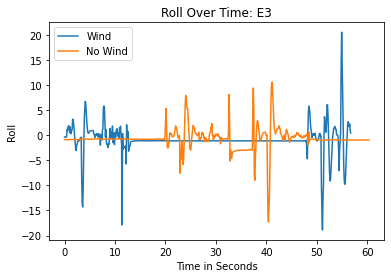

Standard Deviation of Drone E3 with Wind
2.7746992534078427
Standard Deviation of Drone E3 with NO Wind
2.17137403658155


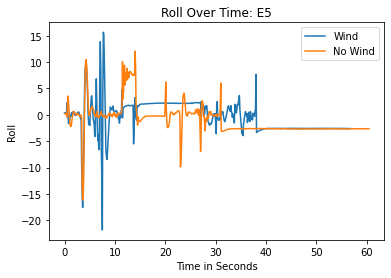

Standard Deviation of Drone E5 with Wind
3.1637940747599256
Standard Deviation of Drone E5 with NO Wind
2.8982325879418136


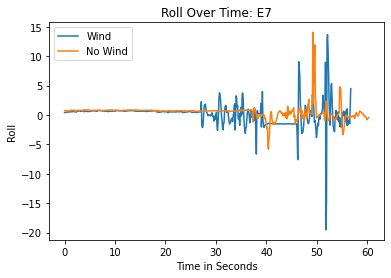

Standard Deviation of Drone E7 with Wind
2.027396262366689
Standard Deviation of Drone E7 with NO Wind
1.2009135304651017


In [285]:
# ---------------------------------------------------------------------------
# --------------------------ROLL FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------

# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------


roll_timeE3 = dataE3.plot(x="time.ms", y ="stabilizer.roll")
roll_timeE3 = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.roll", ax = roll_timeE3)
roll_timeE3.legend(["Wind", "No Wind"])
roll_timeE3.set_title("Roll Over Time: E3")
roll_timeE3.set_xlabel("Time in Seconds")
roll_timeE3.set_ylabel("Roll")
plt.show()

print("Standard Deviation of Drone E3 with Wind")
print(dataE3["stabilizer.roll"].std())
print("Standard Deviation of Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.roll"].std())

# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

roll_timeE5 = dataE5.plot(x="time.ms", y ="stabilizer.roll")
roll_timeE5 = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.roll", ax = roll_timeE5)
roll_timeE5.legend(["Wind", "No Wind"])
roll_timeE5.set_title("Roll Over Time: E5")
roll_timeE5.set_xlabel("Time in Seconds")
roll_timeE5.set_ylabel("Roll")
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.roll"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.roll"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------

roll_timeE7 = dataE7.plot(x="time.ms", y ="stabilizer.pitch")
roll_timeE7 = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.pitch", ax = roll_timeE7)
roll_timeE7.legend(["Wind", "No Wind"])
roll_timeE7.set_title("Roll Over Time: E7")
roll_timeE7.set_xlabel("Time in Seconds")
roll_timeE7.set_ylabel("Roll")
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.pitch"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.pitch"].std())


NOTE: Yaw does not necessarily indicate instability. It is a measurement of the drone turning parallel to the ground.


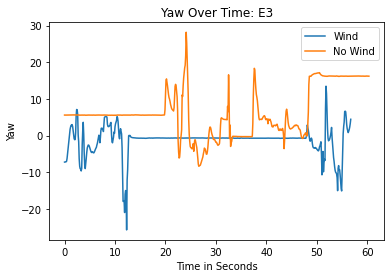

Standard Deviation of Yaw: Drone E3 with Wind
3.7231117009021295
Standard Deviation of Yaw: Drone E3 with NO Wind
6.535773424713877


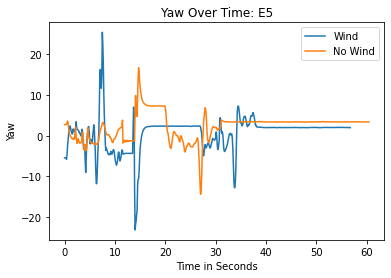

Standard Deviation of Drone E5 with Wind
4.319376500763339
Standard Deviation of Drone E5 with NO Wind
3.2422593284393386


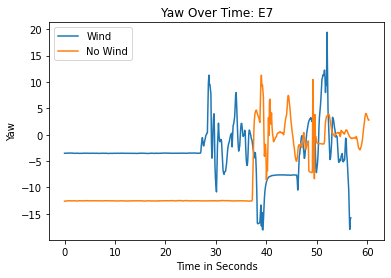

Standard Deviation of Drone E7 with Wind
4.4849965822772635
Standard Deviation of Drone E7 with NO Wind
6.556424873686869


In [286]:
# ---------------------------------------------------------------------------
# --------------------------YAW FOR WIND VS NO WIND------------------------
# ---------------------------------------------------------------------------
# Yaw may not be so relevant as the drone would remain level when changing yaw so doesn't indicate instability necessarily.
# Make sure that the initial settings at the top have a wind speed of 1 or 2. 
# Otherwise the graphs and standard deviation will be exactly the same because they will
# both be using the same data (no wind).

# ---------------------------------------
# -------------------E3------------------
# ---------------------------------------
print("NOTE: Yaw does not necessarily indicate instability. It is a measurement of the drone turning parallel to the ground.")

yaw_timeE3 = dataE3.plot(x="time.ms", y ="stabilizer.yaw")
yaw_timeE3 = dataE3_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = yaw_timeE3)
yaw_timeE3.legend(["Wind", "No Wind"])
yaw_timeE3.set_title("Yaw Over Time: E3")
yaw_timeE3.set_xlabel("Time in Seconds")
yaw_timeE3.set_ylabel("Yaw")
plt.show()

print("Standard Deviation of Yaw: Drone E3 with Wind")
print(dataE3["stabilizer.yaw"].std())
print("Standard Deviation of Yaw: Drone E3 with NO Wind")
print(dataE3_no_wind["stabilizer.yaw"].std())


# ---------------------------------------
# -------------------E5------------------
# ---------------------------------------

yaw_timeE5 = dataE5.plot(x="time.ms", y ="stabilizer.yaw")
yaw_timeE5 = dataE5_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = yaw_timeE5)
yaw_timeE5.legend(["Wind", "No Wind"])
yaw_timeE5.set_title("Yaw Over Time: E5")
yaw_timeE5.set_xlabel("Time in Seconds")
yaw_timeE5.set_ylabel("Yaw")
plt.show()

print("Standard Deviation of Drone E5 with Wind")
print(dataE5["stabilizer.yaw"].std())
print("Standard Deviation of Drone E5 with NO Wind")
print(dataE5_no_wind["stabilizer.yaw"].std())

# ---------------------------------------
# -------------------E7------------------
# ---------------------------------------

yaw_timeE7 = dataE7.plot(x="time.ms", y ="stabilizer.yaw")
yaw_timeE7 = dataE7_no_wind.plot(x="time.ms", y ="stabilizer.yaw", ax = yaw_timeE7)
yaw_timeE7.legend(["Wind", "No Wind"])
yaw_timeE7.set_title("Yaw Over Time: E7")
yaw_timeE7.set_xlabel("Time in Seconds")
yaw_timeE7.set_ylabel("Yaw")
plt.show()

print("Standard Deviation of Drone E7 with Wind")
print(dataE7["stabilizer.yaw"].std())
print("Standard Deviation of Drone E7 with NO Wind")
print(dataE7_no_wind["stabilizer.yaw"].std())


- Possibly do a wind speed vs stasndard deviation of pitch, roll, and yaw as a scatter plot across all data? Shows correlation between increased wind speed and lack of stability in drone?
- Show that the line of best fit of the voltage has a steeper gradient on drones with a wind speed of 2 vs 1, and 1 vs none?
- Visualise waiting times of the three drones? How does w
